# EDA

In [3]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

In [5]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:

# Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [7]:

# Unique values in categorical columns
print(customers['Region'].unique())
print(products['Category'].unique())



['South America' 'Asia' 'North America' 'Europe']
['Books' 'Electronics' 'Home Decor' 'Clothing']


In [10]:
# Merge datasets for deeper analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Total sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
print(sales_by_region)



          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


In [11]:
# Most popular products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(popular_products.head(10))

              ProductName  Quantity
9   ActiveWear Smartwatch       100
47   SoundWave Headphones        97
36    HomeSense Desk Lamp        81
6          ActiveWear Rug        79
45     SoundWave Cookbook        78
4       ActiveWear Jacket        76
13    BookWorld Biography        71
63        TechPro T-Shirt        66
46    SoundWave Desk Lamp        64
64       TechPro Textbook        62


## Distribution of Customer Signups by Year

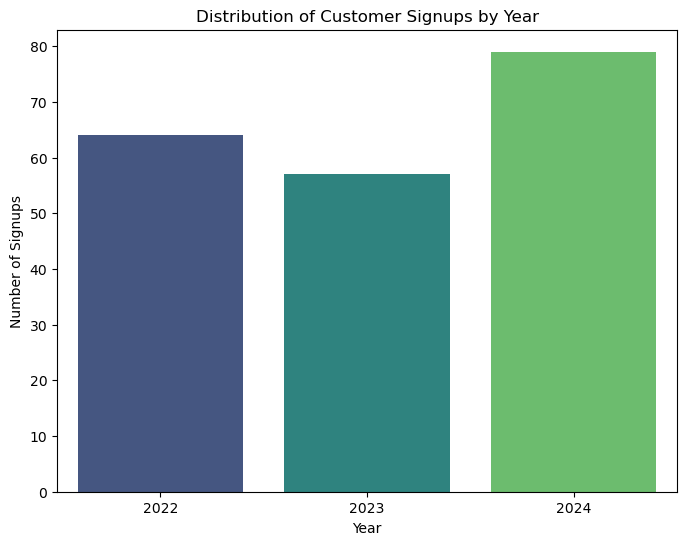

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract year from SignupDate
customers['SignupYear'] = customers['SignupDate'].dt.year

# Plot distribution of signups by year
plt.figure(figsize=(8, 6))
sns.countplot(x='SignupYear', data=customers, palette='viridis')
plt.title('Distribution of Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

## Sales Distribution by Region

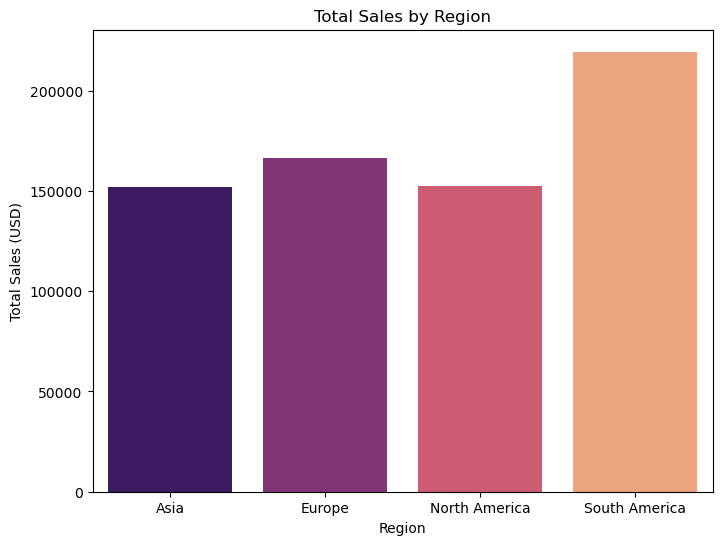

In [16]:
# Merge transactions and customers data
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Group by Region and calculate total sales
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot sales by region
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='TotalValue', data=sales_by_region, palette='magma')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

## Top 10 Most Purchased Products

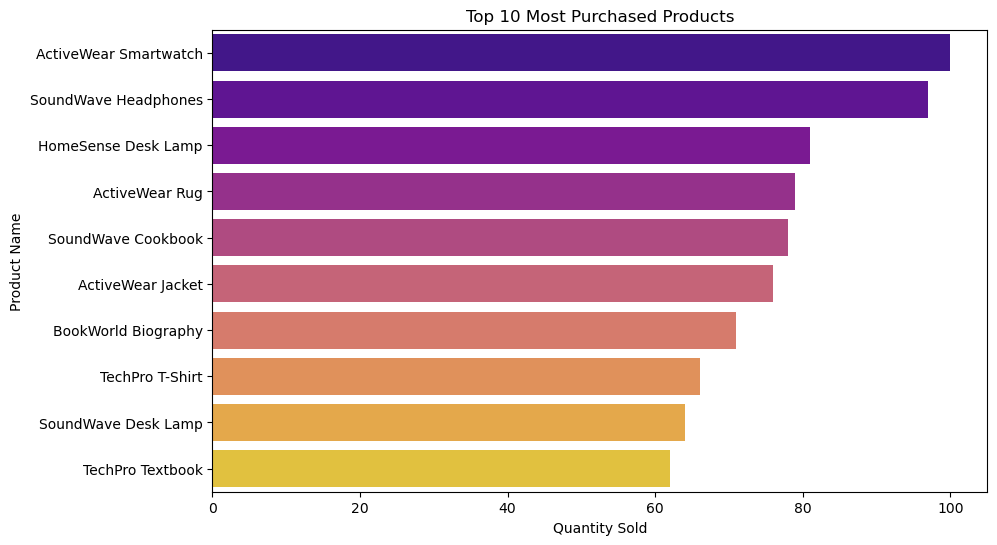

In [17]:
# Merge transactions and products data
merged_data = pd.merge(transactions, products, on='ProductID')

# Group by ProductName and calculate total quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='plasma')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

## Distribution of Transaction Values

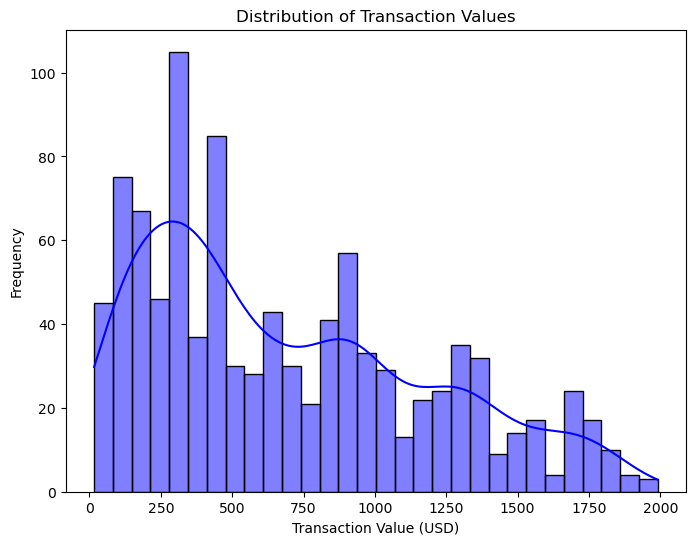

In [19]:
# Plot distribution of transaction values
plt.figure(figsize=(8, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

## Distribution of Product Prices

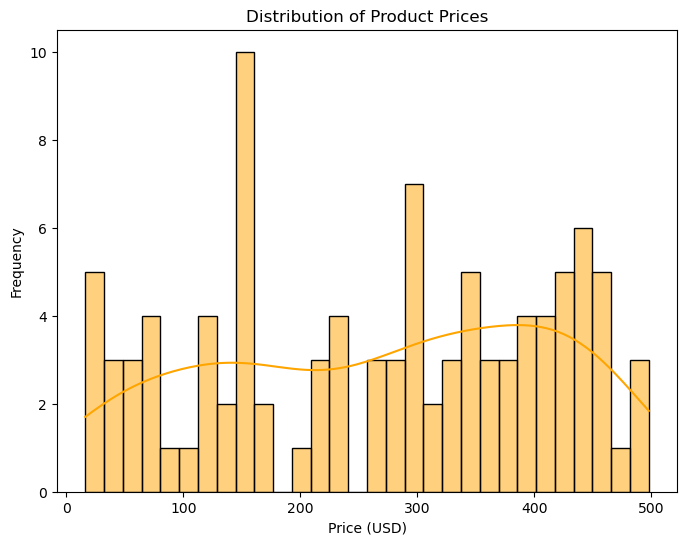

In [23]:
# Plot distribution of product prices
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], bins=30, kde=True, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

## Customer Segmentation by Region

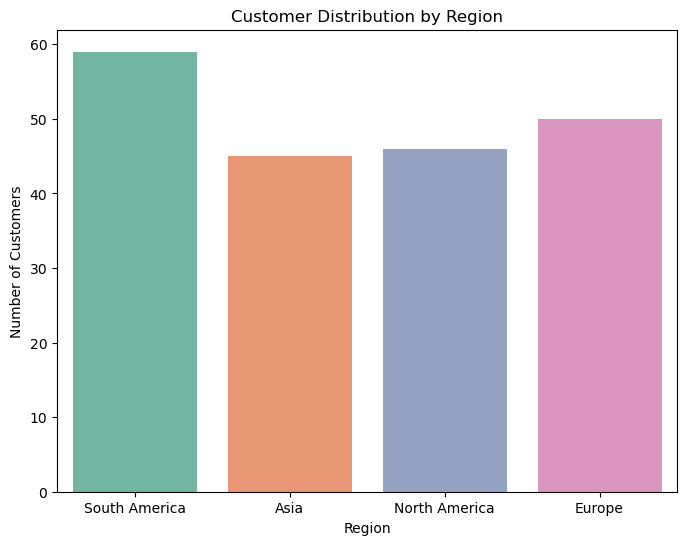

In [25]:
# Plot customer distribution by region
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

## Boxplot of Transaction Values by Region

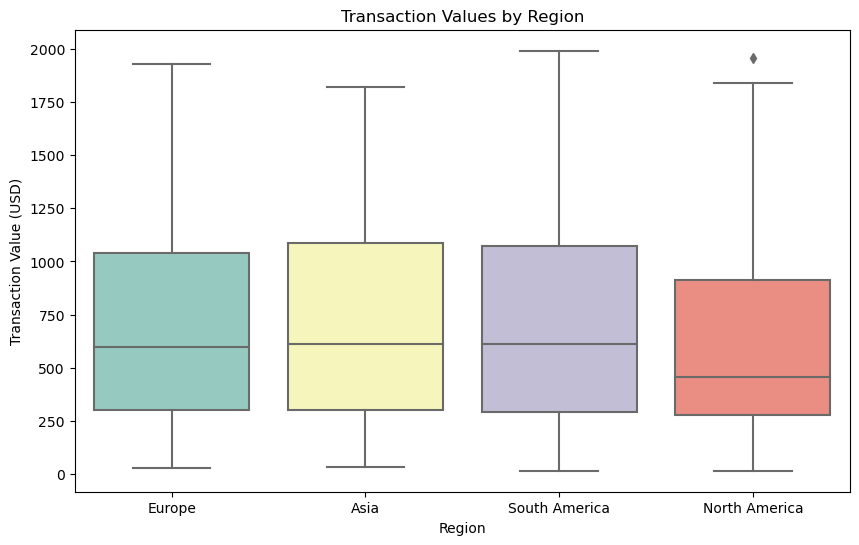

In [26]:
# Plot boxplot of transaction values by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data, palette='Set3')
plt.title('Transaction Values by Region')
plt.xlabel('Region')
plt.ylabel('Transaction Value (USD)')
plt.show()

## Scatter Plot of Quantity vs. TotalValue

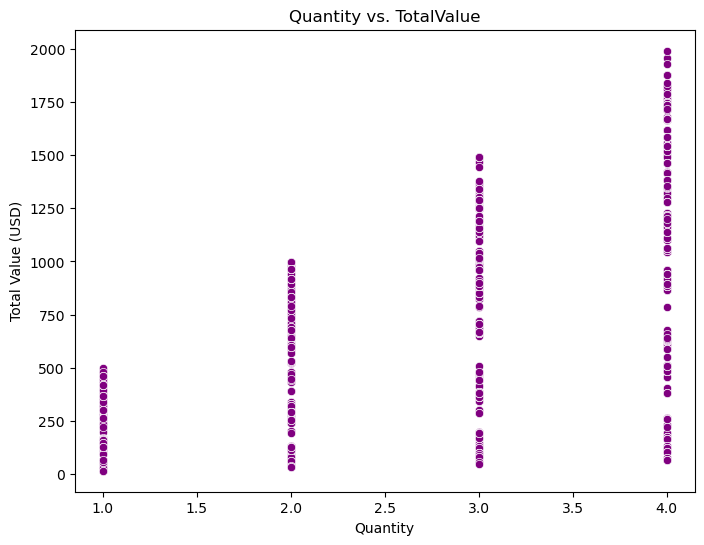

In [27]:
# Plot scatter plot of Quantity vs. TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions, color='purple')
plt.title('Quantity vs. TotalValue')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.show()